# Dijkstra's algorithm visualization using networkx
### Dijkstra's algorithm finds the shortest path from a source vertex to every other vertex in a directed graph with positive edge weights.

In [40]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pylab import *

In [14]:
class Node:
    def __init__(self, node_id, distance, predecessor):
        self.id = node_id
        self.distance = distance # shortest path length estimate from the source vertex
        self.path = []
        self.predecessor = predecessor

In [15]:
class Graph:
    def __init__(self, num_vertices, adj_matrix, weight_matrix):
        self.weight_matrix = weight_matrix
        self.adj_matrix = adj_matrix
        self.nodes = [] # list of node objects

In [69]:
class Dijkstra:
    def __init__(self, source, adj_matrix, weight_matrix, num_vertices):
        self.unvisited_nodes = [i for i in range(num_vertices)] # queue containing node ids of unvisited nodes
        self.graph = Graph(num_vertices, adj_matrix, weight_matrix)
        self.shortest_path_determined = [] # list of visited vertices for which shortest path has been determined
        self.num_vertices = num_vertices
        
    # test whether we can improve the shortest path from node u to node v
    def relax(self, u, v):
        if self.graph.nodes[v].distance > self.graph.nodes[u].distance + self.graph.weight_matrix[u][v]:
            self.graph.nodes[v].distance = self.graph.nodes[u].distance + self.graph.weight_matrix[u][v]
            self.graph.nodes[v].predecessor = u   

    def initialize_single_source(self):
        self.graph.nodes = [Node(i, np.inf, None) for i in range(0, self.num_vertices)] 
        self.graph.nodes[0].distance = 0 # assume vertex 0 is the source node
        self.graph.nodes[0].path.append(0)
        
    # return the edge with minimum weight, among available edges adjacent to the current vertex
    def extract_min(self, nodeid):
        min_weight = np.inf
        minid = -1
        for i in self.unvisited_nodes:
            if self.graph.adj_matrix[nodeid][i] == 1 and self.graph.weight_matrix[nodeid][i] < min_weight:
                minid = i
                min_weight = self.graph.weight_matrix[nodeid][i]
        if minid in self.unvisited_nodes:
            self.unvisited_nodes.remove(minid)
        return minid
    
    # print the path to each vertex in the graph
    def print_shortest_paths(self):
        for i in range(self.num_vertices):
            print("Distance to vertex ", i,": ", self.graph.nodes[i].distance)
        for i in range(1, self.num_vertices):
            predecessor = self.graph.nodes[i].predecessor
            nodeid = i
            while predecessor != 0:
                self.graph.nodes[i].path.insert(0, predecessor)
                nodeid = predecessor
                predecessor = self.graph.nodes[nodeid].predecessor       
            self.graph.nodes[i].path.insert(0, 0)
            if i != 0:
                self.graph.nodes[i].path.append(i)
            
        for i in range(self.num_vertices):
            print("shortest path to vertex ", i, ": ", self.graph.nodes[i].path)
    
    # plot a separate shortest path graph for each vertex (Single source shortest path)
    def plot_shortest_paths(self):        
        # list that contains the shortest path plottable-graph objects for each node.
        #fig = plt.figure()
        #fig, ax = plt.subplots(2,3)
        #spath_obj_list = []
        for each_node in range(1, len(self.graph.nodes)):
            G_temp = nx.from_numpy_matrix(np.matrix(self.graph.adj_matrix)) # create temp nx object
            
            # add edges to the nx object --> at this point, represents entire graph, shortest path NOT colored yet.
            for edge_i in range(self.num_vertices):
                for edge_j in range(edge_i+1, self.num_vertices):
                    G_temp.add_edge(edge_i, edge_j, color='darkgray', weight=2.5)
            
            # color shortest path to each vertex
            for j in range(len(self.graph.nodes[each_node].path)-1):
                G_temp.add_edge(self.graph.nodes[each_node].path[j], self.graph.nodes[each_node].path[j+1], color='g', weight=2.5)
            #spath_obj_list.append(G_temp)
            fixed_positions = {0:(4,2), 1:(2,2), 2:(5,3.5), 3:(1,3.5), 4:(3,4.5)}
            fixed_nodes = fixed_positions.keys()
            pos = nx.spring_layout(G_temp, pos=fixed_positions, fixed=fixed_nodes)
            edges = G_temp.edges()
            colors = [G_temp[u][v]['color'] for u, v in edges]
            weights = [G_temp[u][v]['weight'] for u, v in edges]
            plt.figure(each_node, figsize=(5,5))
            plt.title('Shortest path to vertex %i'% each_node)
            ## subplot code ##
            #ctr = 0
            #subplot(2,3,each_node+1)
#             if each_node != 0 and each_node%3 == 0:
#                 ctr += 1
            #plt.sca(ax[ctr, each_node%3])
            nx.draw_networkx(G_temp, pos=pos, edges=edges, edge_color=colors, width=weights, node_color='blue', node_size=350, font_color='white')
            G_temp.clear()
        
    
    def run(self):
        iteration_ctr = 0
        self.initialize_single_source() # initialize all nodes in the graph
        self.shortest_path_determined.append(0) # first node is obviously the source node
        self.unvisited_nodes.remove(0)
        while self.unvisited_nodes:
            if iteration_ctr == 0: # first iteration, start with vertex 0
                u = 0
            else:
                u = self.extract_min(self.shortest_path_determined[-1])
                # if the current vertex is not connected to any of the unvisited vertices.
                if u == -1:
                    u = self.unvisited_nodes.pop()
                self.shortest_path_determined.append(u)
            # check all vertices adjacent to u
            for i in range(self.num_vertices):
                if self.graph.adj_matrix[u][i] == 1:
                    self.relax(u, i)
            iteration_ctr += 1
        self.print_shortest_paths()
        self.plot_shortest_paths()

Distance to vertex  0 :  0
Distance to vertex  1 :  8
Distance to vertex  2 :  9
Distance to vertex  3 :  5
Distance to vertex  4 :  7
shortest path to vertex  0 :  [0]
shortest path to vertex  1 :  [0, 3, 1]
shortest path to vertex  2 :  [0, 3, 1, 2]
shortest path to vertex  3 :  [0, 3]
shortest path to vertex  4 :  [0, 3, 4]


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


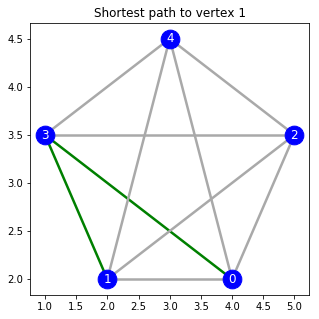

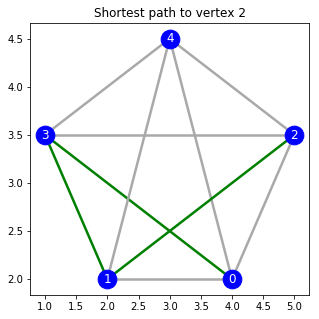

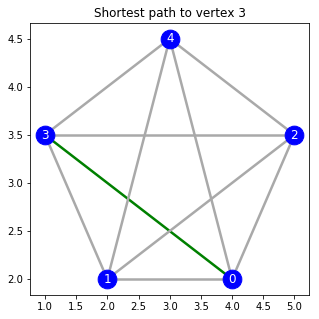

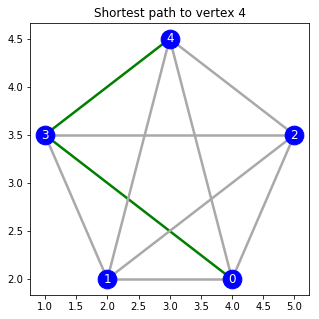

In [70]:
weight_matrix = np.array([[0,10,0,5,0],
                 [0,0,1,2,0],
                 [0,0,0,0,4],
                 [0,3,9,0,2],
                 [7,0,6,0,0]])
adj_matrix = np.array([[0,1,0,1,0],
              [0,0,1,1,0],
              [0,0,0,0,1],
              [0,1,1,0,1],
              [1,0,1,0,0]])
dijk = Dijkstra(0, adj_matrix, weight_matrix, 5)
dijk.run()